In [12]:
import numpy as np
from numpy import linalg as la
import cv2

import matplotlib.pyplot as plt

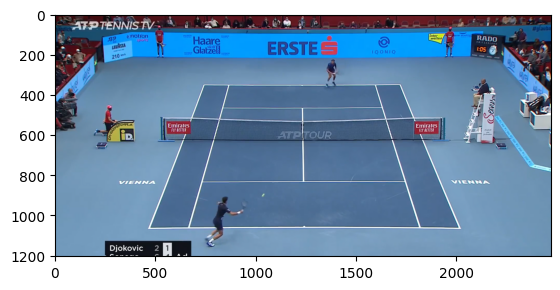

In [4]:
img_path = '/home/suetin/Projects/VSCode/TennisApp/SimpleApp/input_videos/image.png'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img);

In [48]:
img.shape

(1204, 2471, 3)

In [49]:
2471 / 1204

2.052325581395349

In [47]:
WIDTH = 10.97
HEIGHT = 23.77
RATIO = HEIGHT / WIDTH
RATIO

2.1668185961713764

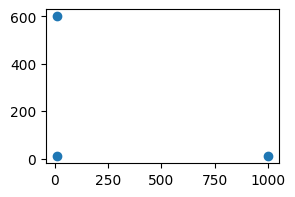

In [44]:
# Court size in pixels
h_cort = 1000 * RATIO
w_cort = 1000

# Specify world coordinates of rectangular license plate
X = np.array([10, 10, h_cort, h_cort])
Y = np.array([10, w_cort, 10, w_cort])

plt.figure(figsize=(3, 2))
plt.scatter(X[:3], Y[:3])

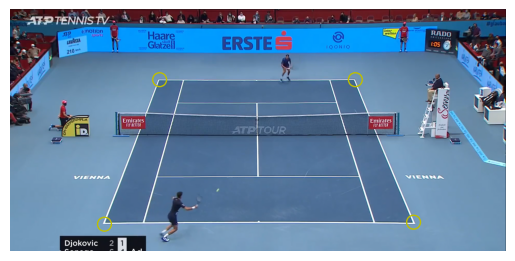

In [45]:
# u = np.array([470, 2010, 745, 1720])  # 1720
# v = np.array([1070, 1060, 350, 350])   # 350
# u, v = [745], [350]
u = np.array([745, 1720, 470, 2010])
v = np.array([350, 350, 1070, 1060])

# Display image with image coordinates 
plt.scatter(u, v, s=100, facecolors= 'none', edgecolors='y')
plt.imshow(img)
plt.axis('off')
plt.show()

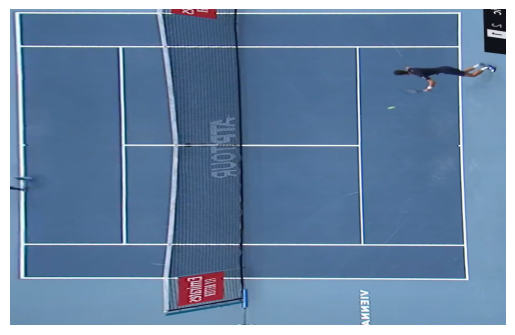

In [46]:
# Estimate homography
A = np.zeros((8, 9))
for i in range(0, 4):
    A[2*i, :] = [ 0, 0, 0, -X[i], Y[i], -1, v[i]*X[i], v[i]*Y[i], v[i] ]
    A[2*i+1, :] = [ X[i], Y[i], 1, 0, 0, 0, -u[i]*X[i], -u[i]*Y[i], -u[i] ]

# total least-squares
L, V = la.eig(A.T @ A)
h = V[:, -1]  # minimial eigenvalue eigenvector
H = np.reshape(h, (3, 3))   # to 3x3 homography
H = la.inv(H)

# Rectify image based on homography
im_warp = cv2.warpPerspective(img, H, (1100, 700))  # (img.shape[1], img.shape[0]))

# Display rectified image
plt.imshow(im_warp)
# plt.gca().invert_yaxis()
plt.axis('off')
plt.show()